In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation

In [2]:
def GetDot(pm):
    return np.sqrt(pm[0]**2 - pm[1]**2 -pm[2]**2 - pm[3]**2)

In [35]:
me = 0.511
mPion = me*273
mMu = me*207
vPion = 0.5

LabPz = mPion*0.5/np.sqrt(1-0.5**2)
LabE = mPion/np.sqrt(1-0.5**2)
Lpm = np.array([LabE,0,0,LabPz])

In [36]:
print(Lpm,GetDot(Lpm))

[161.08418921   0.           0.          80.5420946 ] 139.50300000000001


In [37]:
def GetEMu():
    return (mPion**2 + mMu**2)/(2*mPion)

In [38]:
def GetENu():
    return (mPion**2 - mMu**2)/(2*mPion)

In [39]:
def GetMomentum(E,m):
    return np.sqrt(E**2 - m**2)

In [40]:
def GetAngles():
    phi = np.random.uniform(0., 2*np.pi)
    costheta = np.random.uniform(-1., 1.)
    theta = np.arccos(costheta)
    return theta, phi

In [41]:
def GetMomentumVector(p,theta,phi):
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    pz = p*np.cos(theta)
    return np.array([px,py,pz])

In [42]:
def GetBoost(pmu):
      
    gamma = LabE/mPion
    gammabeta = LabPz/mPion
    
    B = np.array([
        [gamma, 0, 0., gammabeta],
        [0., 1, 0., 0.],
        [0., 0., 1., 0.],
        [gammabeta, 0., 0., gamma]])
    
    return np.dot(B,pmu)

In [43]:
NEvents = 1000
Cm_Pm_Mu = np.zeros((NEvents,4))
Cm_Pm_Nu = Cm_Pm_Mu.copy() 
Lab_Pm_Mu = Cm_Pm_Mu.copy()
Lab_Pm_Nu = Cm_Pm_Mu.copy() 

In [44]:
def Generator(NEvents_ = 1000):
    
    print('---Generating: %.0f events---' %(NEvents_))
    
    for i in range(NEvents_):
        # Center of mass
        EMu = GetEMu()
        ENu = GetENu()
        pMu = GetMomentum(EMu,mMu)
        pNu = GetMomentum(ENu,0.)
        
        theta, phi = GetAngles()
    
        vpMu = GetMomentumVector(pMu,theta,phi)
        # Conservación del momentum
        vpNu = -vpMu
        
        Cm_Pm_Mu[i] = np.concatenate([[EMu],vpMu])
        Cm_Pm_Nu[i] = np.concatenate([[ENu],vpNu])
    
        # Sistema de laboratorio
        Lab_Pm_Mu[i] = GetBoost(Cm_Pm_Mu[i])
        Lab_Pm_Nu[i] = GetBoost(Cm_Pm_Nu[i])
        
        #print(GetDot(Cm_Pm_Mu[i]+Cm_Pm_Nu[i]),GetDot(Lab_Pm_Mu[i]+Lab_Pm_Nu[i]))

In [45]:
Generator(NEvents)

---Generating: 1000 events---


In [46]:
Cm_Pm_Mu[0]

array([109.85376923,  -1.05289533,  20.76265205,  21.13955005])

In [47]:
Cm_Pm_Nu[0]

array([ 29.64923077,   1.05289533, -20.76265205, -21.13955005])

<IPython.core.display.Javascript object>


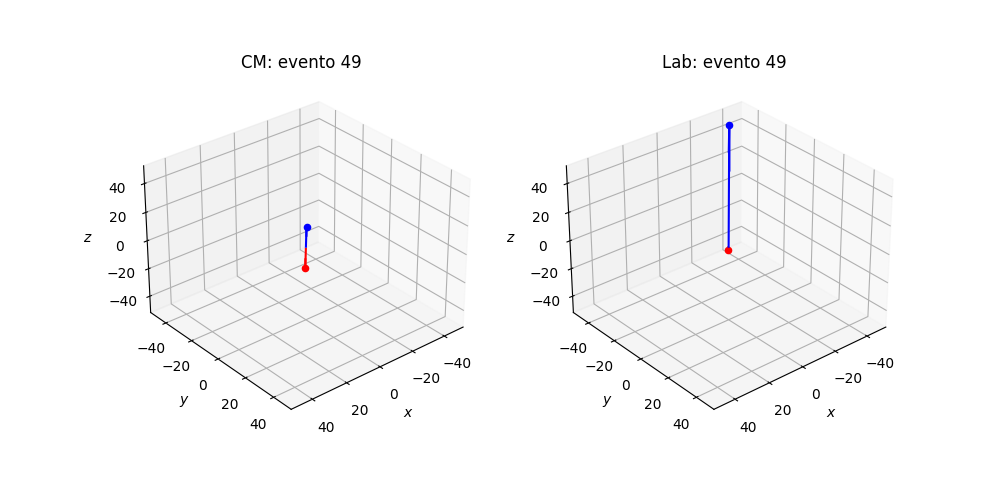

In [52]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, projection = '3d',elev = 30, azim = 50)
ax1 = fig.add_subplot(1,2,2, projection = '3d',elev = 30, azim = 50)


def Init():
    lim = 50
    ax.set_xlim3d(-lim, lim)
    ax.set_ylim3d(-lim, lim)
    ax.set_zlim3d(-lim, lim)
    ax1.set_xlim3d(-lim, lim)
    ax1.set_ylim3d(-lim, lim)
    ax1.set_zlim3d(-lim, lim)

    ax.set_xlabel('$x$', fontsize=10)
    ax.set_ylabel('$y$', fontsize=10)
    ax.set_zlabel('$z$', fontsize=10) 
    ax1.set_xlabel('$x$', fontsize=10)
    ax1.set_ylabel('$y$', fontsize=10)
    ax1.set_zlabel('$z$', fontsize=10)

def Update(i):
    
    
    plot = ax.clear()
    plot = ax1.clear()
    
    Init()
    plot = ax.set_title('CM: evento %.0f' %(i))
    plot = ax1.set_title('Lab: evento %.0f' %(i))
    
    ax.quiver( 0,0,0,Cm_Pm_Mu[i][1],Cm_Pm_Mu[i][2],Cm_Pm_Mu[i][3], color='b' )
    ax.scatter( [Cm_Pm_Mu[i][1]],[Cm_Pm_Mu[i][2]],[Cm_Pm_Mu[i][3]], color='b' )
    ax.quiver( 0,0,0,Cm_Pm_Nu[i][1],Cm_Pm_Nu[i][2],Cm_Pm_Nu[i][3], color='r')
    ax.scatter( [Cm_Pm_Nu[i][1]],[Cm_Pm_Nu[i][2]],[Cm_Pm_Nu[i][3]], color='r' )


    ax1.quiver( 0,0,0,Lab_Pm_Mu[i][1],Lab_Pm_Mu[i][2],Lab_Pm_Mu[i][3], color='b' )
    ax1.scatter( [Lab_Pm_Mu[i][1]],[Lab_Pm_Mu[i][2]],[Lab_Pm_Mu[i][3]], color='b' )
    ax1.quiver( 0,0,0,Lab_Pm_Nu[i][1],Lab_Pm_Nu[i][2],Lab_Pm_Nu[i][3], color='r' )
    ax1.scatter( [Lab_Pm_Nu[i][1]],[Lab_Pm_Nu[i][2]],[Lab_Pm_Nu[i][3]], color='r' )
    
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=NEvents, init_func=Init)   

<IPython.core.display.Javascript object>


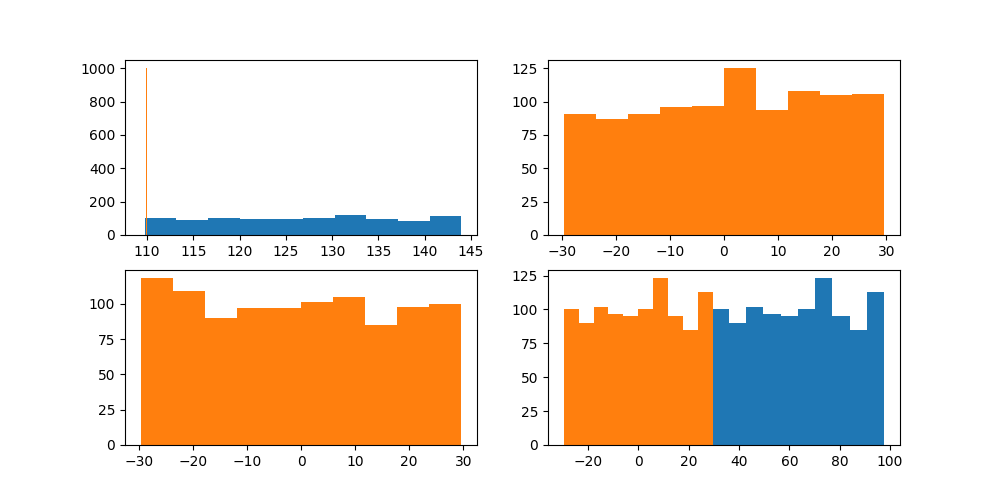

In [50]:
fig1 = plt.figure(figsize=(10,5))

for i in range(4):
    fig1 = plt.subplot(2,2,i+1)
    plt.hist(Lab_Pm_Mu[:,i], bins=10)
    plt.hist(Cm_Pm_Mu[:,i], bins=10)